### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Project: Will Customer Accept Coupon?

### Problem Statement
Once a specific coupon is delivered, what driver’s attributes, driving conditions, demographic factors, and coupon attributes most influence a driver's likelihood of accepting a specific coupon?


### Analysis Outline:
- [Data Description](#Data-Description)
- [Section 1 Data Review, Cleaning, and General Acceptance Rate Insights](#Part-1)
- [Section 2 Investigating the Bar Coupons](#Part-2)
- [Section 3 Independent Investigation – Other Attributes](#Part-3)
- [Section 4 Correlation Analysis](#Part-4)
- [Section 5 Next Steps and Recommendations](#Part-5)


### Summary
Overall, these insights suggest that coupon acceptance is shaped by a combination of behavioral context (companions, time), situational factors (weather, destination urgency), and coupon type. The consistency between descriptive averages and inferential relationships strengthens confidence in these findings:

- Coupon type Carry out & Take away has the highest acceptance rate = 73% vs Bar lowest 41%
- destination is ‘No Urgent Place’, the acceptance rate is highest  0.63 vs ‘Work’ lowest 50%
- passanger is ‘Friend(s), the acceptance rate is highest  67% vs ‘Kid(s)’ lowest 50%
- weather is ‘Sunny’, the acceptance rate is highest  59% vs ‘Rainy’ lowest 46%
- temperature is ‘80’, the acceptance rate is highest  60% vs ‘30’  53%
- time is ‘2PM’, the acceptance rate is highest 66% vs ‘7AM’ lowest 50%
- expiration is ‘1d’, the acceptance rate is highest 62% vs ‘2h’ 50%
- age is ‘below21’, the acceptance rate is highest 63% and overall, the rate decreases with age increasing
- Education shows the lower education level, the higher acceptance rate, the rate of ‘some high school’ is highest 72%
- Occupation shows the rate for ‘retired’ is the lowest 46%, both ‘Healthcare Support’ and ‘Construction & Extraction’ are highest ~70%
- Bar: Those who are more often to go to Bar, the higher acceptance rate, 4-8 times has the highest rate 64%

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [61]:
import pandas as pd
pd.options.display.max_rows=10
import numpy as np
import os
from scipy.stats import uniform, norm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Ignore any warnings
import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Code that might trigger warnings
    warnings.warn("This warning will be hidden", UserWarning)

[Back to Top](#analysis-outline)

### Section 1 Data Review, Cleaning, and General Acceptance Rate Insights


##### Part 1 Data Review and Cleaning Summary
 - The data table has 12684 rows and 26 columns
 - 6 columns with missing: 
   - car: 12576
   - Bar: 107
   - CoffeeHouse: 217
   - CarryAway: 151
   - RestaurantLessThan20: 130
   - Restaurant20To50: 189
 - 74 duplicated rows
 - toCoupon_GEQ5min column only has one value which is 1 so not useful - drop
##### Part 2 General Acceptance Rate Insights
•	Overall, 57% of the total observations chose to accept the coupon
•	Coupon Type Comparison
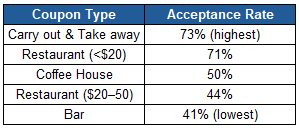

•	Acceptance by Temperature
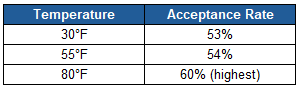

#### Use the prompts below to get started with your data analysis.  
#### Part 1 Data Review and Clearning
##### 1. Read in the `coupons.csv` file.

In [13]:
data = pd.read_csv('coupons.csv')

In [14]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


##### 2. Investigate the dataset for missing or problematic data.


Top 5 Rows:



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0



Bottom 5 Rows:



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0



Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Y,12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0



Data Table: Row x Column



(12684, 26)


Data Table: Column Names and Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object

None


Unique Values by Column:



destination          3
passanger            4
weather              3
temperature          3
time                 5
                    ..
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
direction_opp        2
Y                    2
Length: 26, dtype: int64


Duplicated Row(s): 



74


Missing Values by Column:



destination          0
passanger            0
weather              0
temperature          0
time                 0
                    ..
toCoupon_GEQ15min    0
toCoupon_GEQ25min    0
direction_same       0
direction_opp        0
Y                    0
Length: 26, dtype: int64

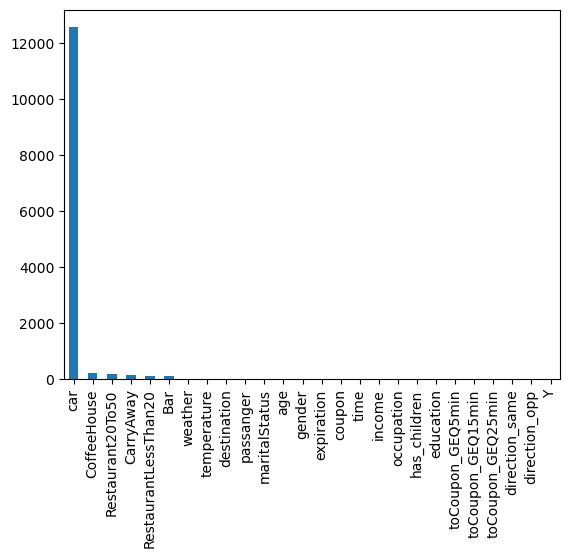

In [15]:
def df_eds(df,head_size = 5, tail_size = 5, show_info = True):
    '''print df summary statistics to screen'''
    
    print("\nTop 5 Rows:\n")                                   # Review Top 5 Rows
    display(df.head(head_size))
    
    print("\nBottom 5 Rows:\n")                                # Review Bottom 5 Rows
    display(df.tail(tail_size))
    
    print("\nDescriptive Statistics:\n")                       # Review Descriptive Statistics
    display(df.describe().transpose())
    # df_hc['col'].value_counts(normalize = True)
    if show_info:            
        print("\nData Table: Row x Column\n")                  # Review # of Row x By of Column
        display(df.shape)
    
        print("\nData Table: Column Names and Data Types\n")   # Review Column Names and Data Types
        display(df.info())
    
        print("\nUnique Values by Column:\n")                  # Review Unique Values by Column
        display(df.nunique())

        print("\nDuplicated Row(s): \n")                  # Review Unique Values by Column
        display(df[df.duplicated()].shape[0])
        
        # gapminder.continent.unique()
        print("\nMissing Values by Column:\n")                 # Review Missing Values By Column
        display(df.isnull().sum())                          # df.isna().sum()    
        df.isnull().sum().sort_values(ascending=False).plot(kind = 'bar')                          # df.isna().sum()    
        plt.show()
df_eds(data)

In [16]:
col=['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

for i in col:
    print(f'{i} Distribution:\n', data[i].value_counts(dropna=False),'\n\n')

car Distribution:
 car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64 


Bar Distribution:
 Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64 


CoffeeHouse Distribution:
 CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: count, dtype: int64 


CarryAway Distribution:
 CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64 


RestaurantLessThan20 Distribution:
 RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: count, dtype: int64 


Restaurant20To50 Distribution:
 Restaurant

#### 3. Decide what to do about your missing data -- drop, replace, other...

 - car: most of car are missing values
      - action: drop the column for now
 - toCoupon_GEQ5min: only has one value
      - action: drop the column
 - duplicated row(s): 74
      - action: drop the duplicates for now

In [17]:
# Based on the distrubutions above:
# 1. For 'car', it will be dropped since most of the value are missing with very thin pupulated data 
data1=data.drop(['car', 'toCoupon_GEQ5min'], axis=1)
# Review number of columns in data1
data.shape, data1.shape

((12684, 26), (12684, 24))

In [18]:
 # given more time, I'd like to look into more and understand the duplicates
data2 = data1.drop_duplicates()  
print("After removing duplicates:", data2.shape)

After removing duplicates: (12610, 24)


In [19]:
# replace/clean up potential spaces in column names
data2.columns = data2.columns.str.replace(' ', '')
data2.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [79]:
data2['Restaurant20To50'].mode()

0    less1
Name: Restaurant20To50, dtype: object

 - For 'Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50', since the missing percentage is small, the missign will be replaced by most freq


In [20]:
# Replace Missing and Review Cleaned data columns in data2
col1=['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
for i in col1:
    mode_val = data2[i].mode()[0]
    data2[i] = data2[i].fillna(mode_val)
    print(f'{i} Distribution:\n', data2[i].value_counts(dropna=False),'\n\n')

Bar Distribution:
 Bar
never    5285
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64 


CoffeeHouse Distribution:
 CoffeeHouse
less1    3579
1~3      3199
never    2946
4~8      1779
gt8      1107
Name: count, dtype: int64 


CarryAway Distribution:
 CarryAway
1~3      4795
4~8      4242
less1    1849
gt8      1572
never     152
Name: count, dtype: int64 


RestaurantLessThan20 Distribution:
 RestaurantLessThan20
1~3      5485
4~8      3553
less1    2071
gt8      1282
never     219
Name: count, dtype: int64 


Restaurant20To50 Distribution:
 Restaurant20To50
less1    6230
1~3      3266
never    2122
4~8       728
gt8       264
Name: count, dtype: int64 




#### Part 2 Investigating the Bar Coupons

##### 4. What proportion of the total observations chose to accept the coupon?
 - **57%** of the total observations chose to accept the coupon



In [21]:
round(data2['Y'].mean(),2)

np.float64(0.57)

##### 5. Use a bar plot to visualize the `coupon` column.
 - From the bar plot and groupby, the acceptance rate by coupon type
      - Carry out & Take away is the highest (0.73)
      - Restaurant(<20) is the second highest (0.71)
      - Coffee House is 0.50
      - Restaurant(20-50) is 0.44
      - Bar	is the lowest (0.41)

In [22]:
data2['coupon'].value_counts()

coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

In [23]:
round(data2.groupby('coupon')[['Y']].mean().sort_values(by='Y'),2)

,Y
coupon,
Bar,0.41
Restaurant(20-50),0.44
Coffee House,0.50
Restaurant(<20),0.71
Carry out & Take away,0.73


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

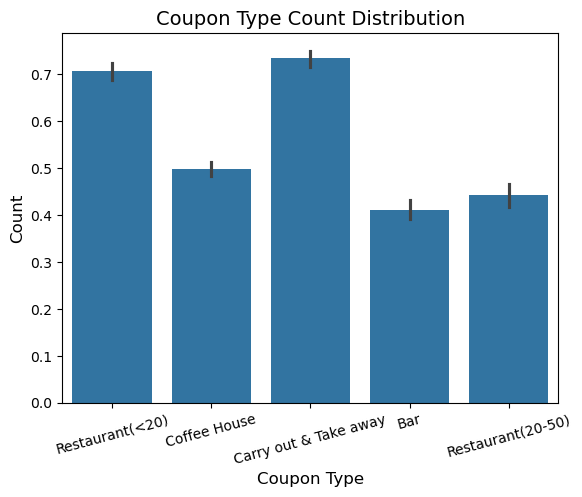

In [24]:
sns.barplot(data2, x="coupon", y='Y')
plt.title("Coupon Type Count Distribution", fontsize=14)
plt.xlabel("Coupon Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)
# Seaborn performs data1.groupby('coupon')['Y'].mean()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

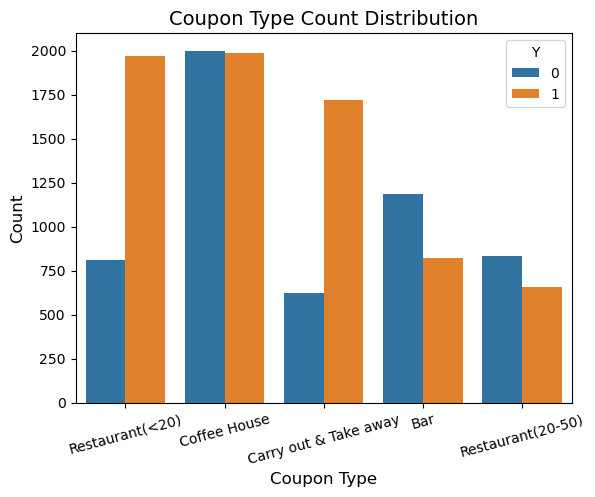

In [25]:
sns.countplot(data2, x="coupon", hue="Y") 
plt.title("Coupon Type Count Distribution", fontsize=14)
plt.xlabel("Coupon Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)

In [26]:
data2.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

##### 6. Use a histogram to visualize the temperature column.
     From the histogram plot and groupby, the acceptance rate by temperature
     - when temperature is 30, the rate is 53%
     - when temperature is 55, the rate is 54%
     - when temperature is 80, the rate is 60%


In [27]:
data2['temperature'].value_counts()

temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64

In [28]:
round(data2.groupby('temperature')[['Y']].mean(),2)

,Y
temperature,
30,0.53
55,0.54
80,0.60


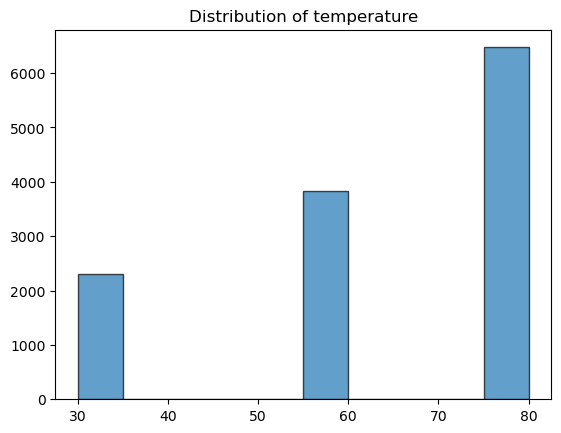

In [29]:
plt.hist(data2['temperature'], edgecolor = 'black', alpha = 0.7)
plt.title('Distribution of temperature');

[Back to Top](#analysis-outline)
### Section 2 Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

##### 1. Create a new `DataFrame` that contains just the bar coupons.


In [31]:
data2['coupon'].value_counts()

coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

In [32]:
round(data2.groupby('coupon')[['Y']].mean(),2)

,Y
coupon,
Bar,0.41
Carry out & Take away,0.73
Coffee House,0.50
Restaurant(20-50),0.44
Restaurant(<20),0.71


In [33]:
df_Barcoupon = data2[data2['coupon']=='Bar']
df_Barcoupon.shape[0]

2010

In [34]:
df_Barcoupon.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,1,0,1,0


##### 2. What proportion of bar coupons were accepted?
  - **41%** of bar coupons were accepted


In [35]:
round(df_Barcoupon['Y'].mean(),2)

np.float64(0.41)

##### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
 - For those who went to a bar 3 or fewer times a month, the acceptance rate is 0.56
 - For those who went to a bar more than 3 times a month, the acceptance rate is 0.62

In [39]:
round(data2.groupby(['Bar'])[['Y']].mean(),3)

,Y
Bar,
1~3,0.621
4~8,0.636
gt8,0.578
less1,0.563
never,0.531


In [36]:
def bar_grp_g3(i):
    if i in ('never','less1','1~3'): return '<=3'
    elif i in ('4~8','gt8'): return '>3'
    else: return 'others'
data2['Bar_grp>3'] = data2['Bar'].apply(bar_grp_g3)
# hrdata.filter(items=['Age','JobLevel','TotalWorkingYears'])

In [40]:
round(data2.groupby(['Bar_grp>3'])[['Y']].mean(),3)
# data.groupby(['Bar_grp>3'])[['Y']].mean()

,Y
Bar_grp>3,
<=3,0.561
>3,0.622


##### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?
 Yes, there is a difference
 - the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 = 0.62
 - the acceptance rate for all others = 0.55

In [41]:
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [42]:
def age_grp_g25(i):
    if i in ('21','below21'): return '<=25'
    else: return '>25'

data2['Age_grp_g25'] = data2['age'].apply(age_grp_g25)

In [43]:
def bar_grp_g1(i):
    if i in ('never','less1'): return '<=1'
    elif i in ('1~3','4~8','gt8'): return '>1'
    else: return 'others'

data2['Bar_grp_g1'] = data2['Bar'].apply(bar_grp_g1)

In [44]:
data2.groupby(['Bar_grp_g1','Age_grp_g25'])[['Y']].mean()
# data.groupby(['Bar_grp>1','Bar'])[['Y']].mean()

Y
Bar_grp_g1 Age_grp_g25          
<=1        <=25         0.592449
           >25          0.528466
>1         <=25         0.624107
           >25          0.620166

In [48]:
# drivers who go to a bar more than once a month and are over the age of 25
data2[(~data2['Bar'].isin(['never','less1'])) & (~data2['age'].isin(['21','below21']))][['Y']].mean()

Y    0.620166
dtype: float64

In [49]:
# all others- calculation 1
data2[(data2['Bar'].isin(['never','less1'])) | ((~data2['Bar'].isin(['never','less1'])) & (data2['age'].isin(['21','below21'])))][['Y']].mean()

Y    0.552779
dtype: float64

In [50]:
# all others - calculation 2
data2[(data2['Bar_grp_g1']=='<=1') | ((data2['Bar_grp_g1']=='>1') & (data2['Age_grp_g25'] =='<=25'))][['Y']].mean()

Y    0.552779
dtype: float64

In [71]:
df_Barcoupon.groupby('Bar')[['Y']].size()

Bar
1~3      397
4~8      150
gt8       49
less1    570
never    851
dtype: int64

In [51]:
def occu_grp_fff(i):
    if i in ('Farming Fishing & Forestry'): return 'Farming Fishing & Forestry'
    else: return 'others'

data2['Occu_grp_fff'] = data2['occupation'].apply(occu_grp_fff)

In [52]:
def pass_grp_notkid(i):
    if i not in ('Kid(s)'): return 'not a kid'
    else: return 'others'

data2['Pass_grp_notkid'] = data2['passanger'].apply(pass_grp_notkid)

In [53]:
data2['Occu_grp_fff'].value_counts()

Occu_grp_fff
others                        12567
Farming Fishing & Forestry       43
Name: count, dtype: int64

##### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
 - Bar-goers > 1/month + no kid passengers + non-agricultural job: the acceptance rate is **62%**

In [122]:
data2[(~data2['Bar'].isin(['never','less1'])) \
    & (~data2['passanger'].isin(['Kid(s)'])) \
    & (~data2['occupation'].isin(['Farming Fishing & Forestry']))] \
      [['Y']].mean()

Y    0.622252
dtype: float64

In [123]:
# Review 
data2.groupby(['Bar_grp_g1','Pass_grp_notkid','Occu_grp_fff'])[['Y']].mean()

Y
Bar_grp_g1 Pass_grp_notkid Occu_grp_fff                        
<=1        not a kid       Farming Fishing & Forestry  0.545455
                           others                      0.550120
           others          Farming Fishing & Forestry  0.500000
                           others                      0.479087
>1         not a kid       others                      0.622252
           others          others                      0.603960

##### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [54]:
data2[(data2['Bar_grp_g1'] == '>1') & (data2['Pass_grp_notkid']=='not a kid') & (~data2['maritalStatus'].isin(['Widowed']))][['Y']].mean()

Y    0.622252
dtype: float64

In [56]:
data2[(data2['Bar_grp_g1'] == '>1') & (data2['age'].isin(['below21','21','26']))][['Y']].mean()

Y    0.627538
dtype: float64

In [57]:
incomelist = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']
data2[(data2['income'].isin(incomelist)) & (data2['RestaurantLessThan20'].isin(['4~8','gt8']))][['Y']].mean()

Y    0.600264
dtype: float64

##### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [58]:
data2['toCoupon_GEQ15min'].value_counts()

toCoupon_GEQ15min
1    7059
0    5551
Name: count, dtype: int64

In [59]:
data2['temperature'] = data2['temperature'].astype(str)

[Back to Top](#analysis-outline)

### Section 3 Independent Investigation - Other Attributes

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [215]:
columns2=['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
          'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
          'toCoupon_GEQ25min', 'direction_same', 'direction_opp']
for col in columns2:
    print(f"\n=== {col} ===")
    print(round(data2.groupby([col])[['Y']].mean().sort_values(by='Y'), 2))


=== destination ===
                    Y
destination          
Work             0.50
Home             0.51
No Urgent Place  0.63

=== passanger ===
              Y
passanger      
Kid(s)     0.50
Alone      0.52
Partner    0.59
Friend(s)  0.67

=== weather ===
            Y
weather      
Rainy    0.46
Snowy    0.47
Sunny    0.59

=== temperature ===
                Y
temperature      
30           0.53
55           0.54
80           0.60

=== time ===
         Y
time      
7AM   0.50
10PM  0.51
6PM   0.58
10AM  0.61
2PM   0.66

=== coupon ===
                          Y
coupon                     
Bar                    0.41
Restaurant(20-50)      0.44
Coffee House           0.50
Restaurant(<20)        0.71
Carry out & Take away  0.73

=== expiration ===
               Y
expiration      
2h          0.50
1d          0.62

=== gender ===
           Y
gender      
Female  0.55
Male    0.59

=== age ===
            Y
age          
50plus   0.51
36       0.54
31       0.55
41       0.57


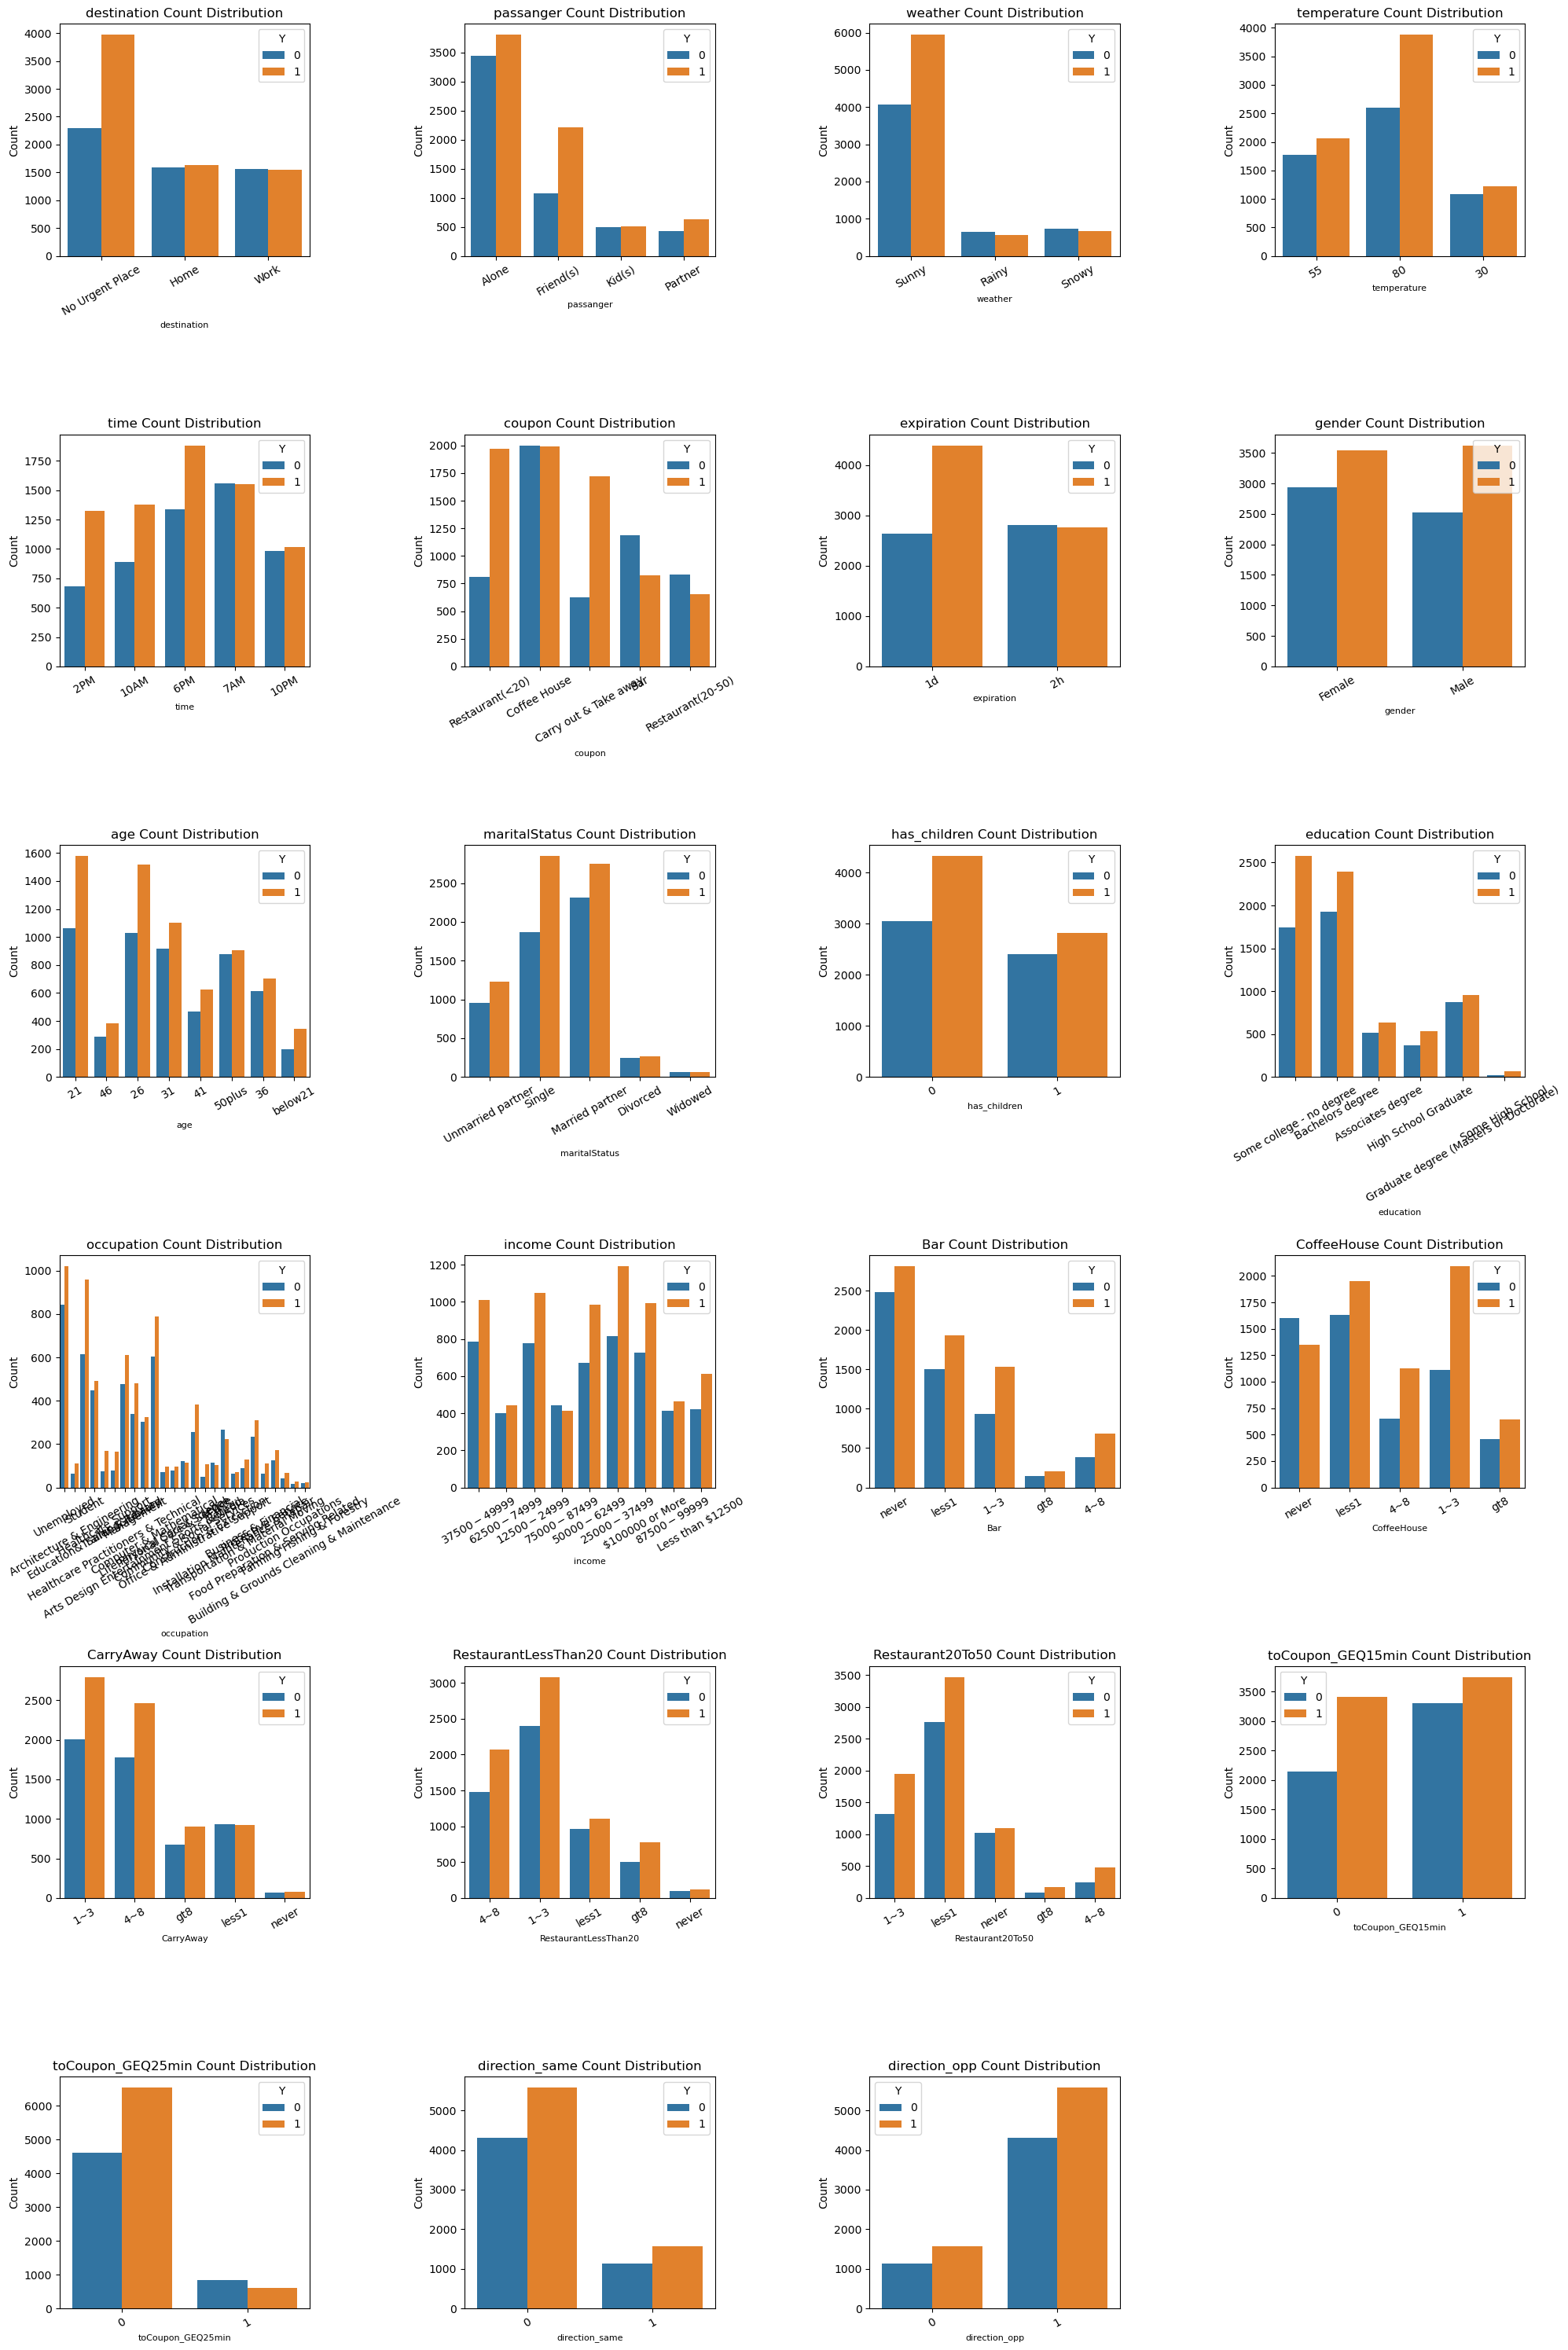

In [163]:
# Create bar plot to all the variables to explore and understand the attributes of high acceptance rate
# Create 
columns= ['coupon','destination', 'passanger', 'weather', 'time', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 
          'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50','temperature']
columns2=['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
          'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
          'toCoupon_GEQ25min', 'direction_same', 'direction_opp']
# Define grid size (e.g. 4 rows × 5 columns for 17 plots)
rows, cols = 6, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(columns2):
    sns.countplot(data=data2, x=col, hue="Y", ax=axes[i])
    axes[i].set_title(f"{col} Count Distribution", fontsize=12)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=30)

# Remove empty subplots if fewer than grid size
for j in range(len(columns2), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Review correlation matrix and identify top 10 correlations with Y
- Features showed moderate positive correlation with coupon acceptance (Y), including:
   'coupon_Carry out & Take away', 'coupon_Restaurant(<20)', 'destination_No Urgent Place', 'expiration_2h', 'passanger_Friend(s)',
   'CoffeeHouse_never', 'toCoupon_GEQ25min', 'weather_Sunny', 'coupon_Coffee House', 'coupon_Restaurant(20-50)'
- Statistical significance of these relationships implies non-random influence.
  e.g., When age is ‘below21’, the acceptance rate is highest 63%, the rate increases with age decreasing, the younger age, more likely to accept.
- Visualizations and grouped means (groupby().mean()) across categories confirmed patterns observed in descriptive stats and hinted at potential predictive variables.

In [164]:
# Convert categories to binary features
data2_encoded = pd.get_dummies(data2.drop(['Age_grp_g25','Bar_grp_g1','Occu_grp_fff','Pass_grp_notkid'],axis=1), \
                               columns= ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', \
                                         'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar',\
                                         'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], drop_first=True, dtype=int)
data2_encoded.head(3)
# OneHotEncoder(drop='first')

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_No Urgent Place,destination_Work,passanger_Friend(s),...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,80,1,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,80,1,1,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [139]:
data2_encoded.corr()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_No Urgent Place,destination_Work,passanger_Friend(s),...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
temperature,1.000000,-0.018599,-0.157089,-0.227165,0.097972,-0.097972,0.059393,0.139103,-0.107002,0.105435,...,-0.026467,-0.011634,0.006226,0.032216,-0.005828,-0.030444,-0.040717,0.000505,-0.035238,0.041856
has_children,-0.018599,1.000000,0.079434,-0.010773,-0.032353,0.032353,-0.045056,0.022429,-0.017093,-0.049322,...,0.013455,0.067847,-0.039635,-0.035904,-0.030178,-0.030533,0.043644,-0.043211,0.022727,-0.018758
toCoupon_GEQ15min,-0.157089,0.079434,1.000000,0.321260,-0.302066,0.302066,-0.082693,0.039725,0.089575,0.128087,...,0.006296,0.007190,0.000019,-0.008276,0.008480,0.001718,-0.005842,-0.010919,0.004309,-0.003366
toCoupon_GEQ25min,-0.227165,-0.010773,0.321260,1.000000,-0.189900,0.189900,-0.108139,-0.360045,0.361601,-0.215334,...,0.006637,0.000828,-0.005623,-0.007159,0.003826,-0.000774,-0.005799,-0.002818,-0.000891,0.007816
direction_same,0.097972,-0.032353,-0.302066,-0.189900,1.000000,-1.000000,0.014932,-0.520950,0.235593,-0.311567,...,0.006248,0.005721,-0.003355,-0.008504,0.004482,0.010033,0.011646,-0.007952,-0.012665,0.020423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RestaurantLessThan20_never,-0.030444,-0.030533,0.001718,-0.000774,0.010033,-0.010033,-0.008941,-0.005855,-0.000115,-0.000239,...,0.131948,-0.014685,-0.083267,-0.044724,-0.058933,1.000000,-0.032907,-0.019441,-0.104660,0.188464
Restaurant20To50_4~8,-0.040717,0.043644,-0.005842,-0.005799,0.011646,-0.011646,0.043795,-0.001869,-0.006132,-0.008557,...,-0.060311,-0.027341,0.114036,0.137246,-0.069346,-0.032907,1.000000,-0.036196,-0.244599,-0.111339
Restaurant20To50_gt8,0.000505,-0.043211,-0.010919,-0.002818,-0.007952,0.007952,0.028134,0.006444,0.002320,0.027845,...,-0.026166,-0.016152,-0.064501,0.394359,-0.064823,-0.019441,-0.036196,1.000000,-0.144502,-0.065776
Restaurant20To50_less1,-0.035238,0.022727,0.004309,-0.000891,-0.012665,0.012665,-0.021750,0.009602,-0.005326,0.007071,...,0.032956,0.049279,-0.066769,-0.148206,0.064141,-0.104660,-0.244599,-0.144502,1.000000,-0.444488


In [168]:
import pandas as pd

# Create correlation matrix
corr_matrix = data2_encoded.corr()

# Extract correlations with target only
target_corr = corr_matrix['Y'].drop('Y')

# Sort by strength of relationship
top_corr = target_corr.abs().sort_values(ascending=False)

print(top_corr.head(10))  # Top 10 correlated features with target

coupon_Carry out & Take away    0.160325
coupon_Restaurant(<20)          0.150508
destination_No Urgent Place     0.132106
expiration_2h                   0.128737
passanger_Friend(s)             0.126674
CoffeeHouse_never               0.122587
toCoupon_GEQ25min               0.108139
weather_Sunny                   0.102533
coupon_Coffee House             0.094664
coupon_Restaurant(20-50)        0.093052
Name: Y, dtype: float64


[Back to Top](#analysis-outline)

### Section 4 Correlation Analysis

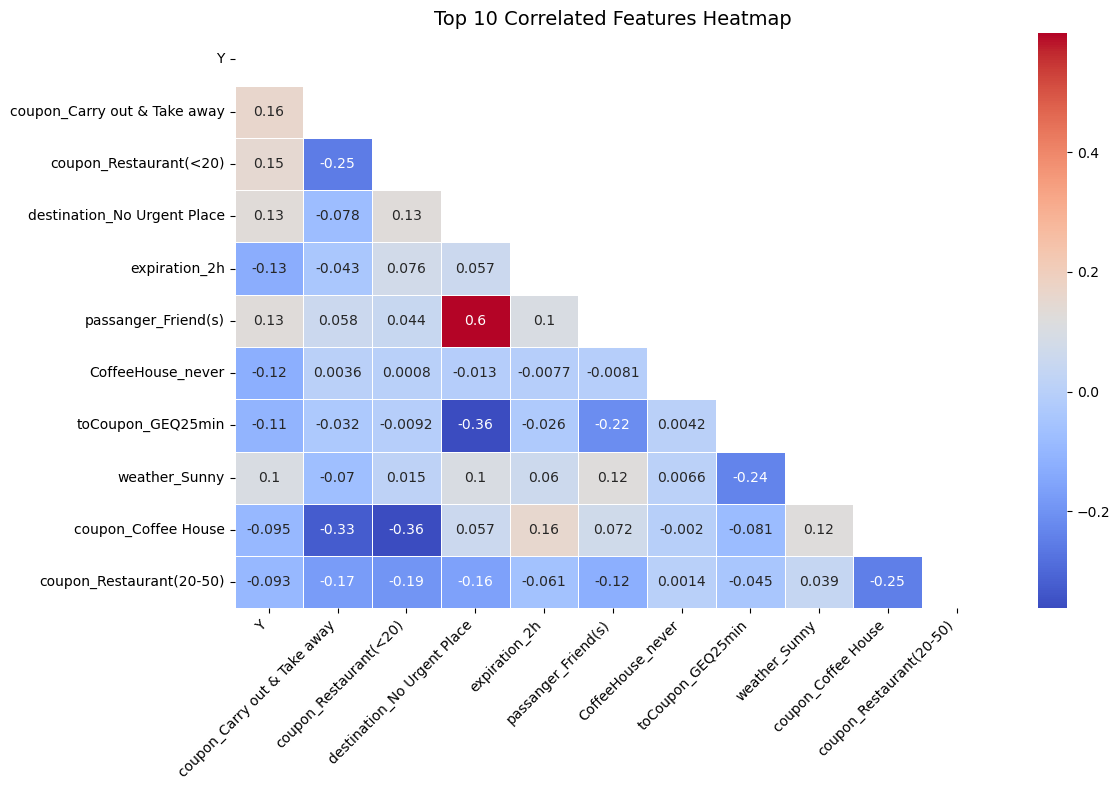

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare correlation data
data3_top10corr = data2_encoded[['Y', 'coupon_Carry out & Take away', 'coupon_Restaurant(<20)',
                                 'destination_No Urgent Place', 'expiration_2h', 'passanger_Friend(s)',
                                 'CoffeeHouse_never', 'toCoupon_GEQ25min', 'weather_Sunny',
                                 'coupon_Coffee House', 'coupon_Restaurant(20-50)']]

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(data3_top10corr.corr(), dtype=bool))
sns.heatmap(data3_top10corr.corr(), annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title("Top 10 Correlated Features Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

[Back to Top](#analysis-outline)

### Section 5 Next Steps and Recommendations

**1. Data Expansion:** Investigate outliers, duplicates, and potential sampling biases

**2. Feature Engineering:** Create meaningful features, composite features, and/or interaction terms (e.g., age × time × coupon type)

**3. Multicollinearity Review:** Use techniques like PCA or VIF to manage highly correlated features

**4. Feature Selection:** Rank feature importance via statistical or model-based methods

**5. Modeling:** Train models using logistic regression, decision trees, or ensemble methods

**6. Model Optimization:** model tuning, testing, and validation to ensure generalizability
